### Things that need to be done
 
* Create the a test database that has:
  * base_data
  * accel_data
  
* Add on the following tables
  * bearing_capacity
  
* Add on the followinig tables
  * bluedrop config
  * bluedrop calibration data

* Trim the top of the bearing data plot (doesn't make a lot of sense but sure)
* 
### Options for formattig data
* Use a JSON for a quickoverview of the survey metadata
* Use a csv format to store information about each of the drops

In [1]:
# Library installs
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Local loads
from lib.data_classes.pffpFolder import pffpDataFolder
from lib.signal_processing.signal_function import moving_average, find_deriv_change, find_drops
from lib.general_functions.global_constants import GRAVITY_CONST
from lib.general_functions.helper_function import convert_time_units


In [3]:
# Data folder
folder_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops"

# PFFP sensor data
calibration_dir = r"calibration_factors\BlueDrop_Calibration_Factors.xlsx"

# PFFP tip information
tip_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\calibration_factors\BluedDrop_Cone_Values.xlsx"


In [4]:
# TODO: Combine the pffp_id and the read_calibration_excel_sheet just have the objet call inside
name = "foo"
id = 9
test_folder = pffpDataFolder(folder_dir, pffp_id = id, calibration_factor_dir=calibration_dir, survey_name = name)

# Read the calibration data
test_folder.read_calibration_excel_sheet()
test_folder.calibration_excel_sheet

# Select the specific calibration params
if id == 3:
    test_folder.get_sensor_calibration_params("Sequim_2021")
elif id == 1:
    test_folder.get_sensor_calibration_params("March_2023")
elif id ==9:
    test_folder.get_sensor_calibration_params("October_2023")
else:
    raise ValueError("not a valid pffp id")

In [5]:
# Init a pffpFile instances for each binary file and store the results in the folder
test_folder.store_pffp_files(recursive = False)

print(test_folder) # Information about the folder

Folder: C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops 
Date range: Not set 
PFFP id: 9                 
Calibration Param dir: calibration_factors\BlueDrop_Calibration_Factors.xlsx 
Num .bin files: 1                 
Num files with drops: Not Set


In [6]:
# Analyze the selected pffp files
test_folder.analyze_all_files(store_df=True, use_pore_pressure=True, 
                              select_accel=["2g_accel", "50g_accel", "250g_accel"],
                              debug = False)
print(test_folder)

test_folder.process_drop_files()

# Store the first drop file
file = test_folder.pffp_drop_files[0]
drop = file.drops[0]

pffp_id = test_folder.pffp_id
drop.get_pffp_tip_values(pffp_id=pffp_id, tip_type="cone", date_string = "April_2024", file_dir = tip_dir)

drop.water_drop = 1
drop.convert_tip_vals()



Folder 'C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\no_drop_folder' already exists.
Folder 'C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\funky' already exists.

Progress finding files with drops...
[==================================================] 100.00% ETA (min): 0.0
Initial analysis complete!
Folder: C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops 
Date range: Not set 
PFFP id: 9                 
Calibration Param dir: calibration_factors\BlueDrop_Calibration_Factors.xlsx 
Num .bin files: 1                 
Num files with drops: 1

Progress processing drops in files...
[==================================================] 100.00% ETA (min): 1.7e-08

In [7]:
accel = file.concat_accel
time = file.df["Time"] * 60
pressure = file.df["pore_pressure"]

In [8]:
drop.quick_view_impulse()

In [9]:
display(drop.bearing_dfs["mantle"])

None

In [10]:
qsbc_vals = [0.2, 0.5, 0.9, 1.2, 1.5]

for name in ["mantle", "projected"]:
    drop.calc_drop_contact_area(area_type = name)
    drop.calc_drop_dynamic_bearing(area_type = name)
    for val in qsbc_vals:
        drop.calc_drop_qs_bearing(k_factor = val, area_type = name)
        drop.calc_drop_qs_bearing(k_factor = val, area_type = name)

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\lib\mechanics_functions\bearing_capacity_funcs.py:121: RuntimeWarning:

invalid value encountered in log10

c:\Geotech

In [11]:
drop.bearing_dfs["projected"]

,contact_area_projected,qDyn_projected,qsbc_proj_0.2,qsbc_proj_0.5,qsbc_proj_0.9,qsbc_proj_1.2,qsbc_proj_1.5
0,0.000015,4.803196e+06,3.228629e+06,2.164359e+06,1.503535e+06,1.223390e+06,1.031245e+06
1,0.000043,1.767245e+06,1.187932e+06,7.963569e+05,5.532164e+05,4.501401e+05,3.794418e+05
2,0.000086,9.673358e+05,6.502506e+05,4.359159e+05,3.028263e+05,2.464040e+05,2.077047e+05
3,0.000142,6.461422e+05,4.343527e+05,2.911869e+05,2.022867e+05,1.645976e+05,1.387469e+05
4,0.000213,4.847432e+05,3.258669e+05,2.184635e+05,1.517680e+05,1.234920e+05,1.040976e+05
...,...,...,...,...,...,...,...
112,0.006013,1.157844e+04,1.157844e+04,1.157844e+04,1.157844e+04,1.157844e+04,1.157844e+04
113,0.006013,1.082956e+04,1.082956e+04,1.082956e+04,1.082956e+04,1.082956e+04,1.082956e+04
114,0.006013,1.012893e+04,1.012893e+04,1.012893e+04,1.012893e+04,1.012893e+04,1.012893e+04
115,0.006013,9.488922e+03,9.488922e+03,9.488922e+03,9.488922e+03,9.488922e+03,9.488922e+03


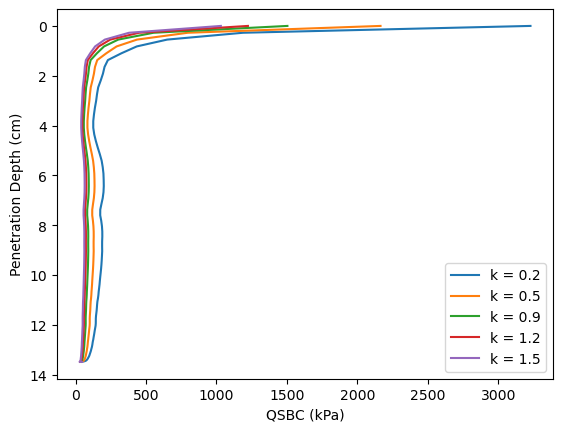

In [12]:

displacement = drop.impulse_df["displacement"]
df = drop.bearing_dfs["projected"]

end = -17
for val in qsbc_vals:
    column = "qsbc_proj_{}".format(val)
    k_name=  "k = {}".format(val)
    bearing = df[column][:end]
    bearing = bearing/1e3
    plt.plot(bearing, displacement[:end] * 100, label= k_name)

plt.legend()
plt.gca().invert_yaxis()
plt.ylabel("Penetration Depth (cm)")
plt.xlabel("QSBC (kPa)")
plt.show()

In [13]:
# Make the drop id
drop.make_drop_name()
drop.get_drop_datetime(file)
drop.get_peak_impulse_deceleration()

print(drop.name)

foo_0C25_index_1


In [14]:
import sqlite3

In [15]:
from BlueDrop_db_lib.dbClass import PFFPDatabase

In [16]:
# Input fake date information
survey_year = "24"
survey_month = "01"
survey_start_day = "01"

survey_name = test_folder.survey_name
survey_id = "{}_YR{}{}{}".format(survey_name, survey_year, survey_month, survey_start_day)

bluedrop_id = test_folder.pffp_id
pffp_calibration_df = test_folder.calibration_params
pffp_calibration_dict = {"pffp_id":bluedrop_id, "pffp_calibration_df":pffp_calibration_df}

location = "foo_location"
transect = "foo_transect"
latitude = 1.0
longitude = 2.0


In [17]:
location_dict = {"survey_id":survey_id, "survey_name":survey_name, "location_name":location, "transect":transect, "latitude":latitude, "longitude":longitude}

In [18]:
database = PFFPDatabase("foo3")
database.create_database()

df = drop.pffp_config["tip_props"]

Database 'foo3' loaded successfully.
Database 'foo3' created successfully.
Database 'foo3' created successfully.


In [19]:
sub_df =list( df[df['Properties'] != 'radius_coeff']["units"])
display(sub_df)

['kg', 'm', 'm', 'm', 'm^3']

In [20]:
database.add_drop_data(drop, pffp_calibration_dict=pffp_calibration_dict, location_dict=location_dict, pffp_config_dict=drop.pffp_config)

Accelerometer table created successfully.
Accelerometer data updated/added successfully.
BearingCapacityData table created successfully.
Bearing capacity data updated/added successfully.
Bearing capacity data updated/added successfully.
PffpCalibration table created successfully.
Accelerometer calibration data added successfully.
Survey table created successfully.
Survey data added successfully.
PffpConfiguration table created successfully.
PffpConfiguration updated successfully.
Drop data added successfully.


In [21]:
test_folder.calibration_params

,Sensor,October_2023_offset,October_2023_scale
0,2g_accel,-17196.9,1626262.4
1,18g_accel,27399.6,159870.4
2,50g_accel,-246643.4,63690.9
3,200g_accel,16353.5,27604.8
4,250g_accel,-8819.9,13630.9
5,55g_x_tilt,-16510.0,65260.8
6,55g_y_tilt,71742.6,65778.7
7,pore_pressure,17912.7,20278.7


In [22]:
drop.pffp_config

{'tip_type': 'cone',
 'tip_props':      Properties units  cone_April_2024
 0     pffp_mass    kg         7.710000
 1    tip_height     m         0.075500
 2   base_radius     m         0.043750
 3    tip_radius     m         0.002200
 4  radius_coeff     -         0.000000
 5   pffp_volume   m^3         0.002473,
 'tip_col_name': 'cone_April_2024'}

In [23]:
display(database.get_table_as_df(name = "drops"))

,drop_id,drop_name,drop_datetime,survey_name,survey_id,analysis_date,water_drop
0,20240617192448429839,foo_0C25_index_1,2024-04-24T19:01:01.810452,foo,foo_YR240101,2024-06-17T19:24:48.429839,1


In [24]:

display(database.get_table_as_df(name = "accel"))

,drop_id,drop_timestamp,impulse_start_index,impulse_time,impulse_accel,release_start_index,release_time,release_accel,peak_deceleration
0,20240617192448429839,2024-04-24T19:01:01.810452,b'\xc04\x00\x00\x00\x00\x00\x00',b're\xc0\t\x1b\x02\x1b@W\x92v\x1c\x9e\x02\x1b@...,b'$\xfb4\xf7\xc9\xfe\x06@dp*M\xf7\x82\n@hx\xd2...,"b'\x1a""\x00\x00\x00\x00\x00\x00'",b'\xf9\x1bw\x18\xccu\x11@\xdeH-+Ov\x11@\xc4u\x...,b'\x80\xad\xefH.\x14\xde\xbf\x80&\xb8m\x18d\xd...,209.896714


In [25]:
display(database.get_table_as_df(name = "bearing"))

,drop_id,drop_name,area_type,contact_area_name,contact_area_data,dynamic_name,dynamic_data,qsbc_name_1,qsbc_data_1,qsbc_name_2,qsbc_data_2,qsbc_name_3,qsbc_data_3,qsbc_name_4,qsbc_data_4,qsbc_name_5,qsbc_data_5
0,20240617192448429839,foo_0C25_index_1,projected,contact_area_projected,b'FE\xff\xadI\xe3\xef>\x05\xb1\x90# \xac\x06?\...,qDyn_projected,b'\x07\x11k\r\x9fRRA\xb1\x84>\tM\xf7:Ah\x8f\xd...,qsbc_proj_0.2,b'T@xS\xea\xa1HA~R9J\\ 2A\xdc\x81\x16=\x15\xd8...,qsbc_proj_0.5,b'\x0c\xfa|\x9fC\x83@A\xb6\xf2/\xe2\x89M(A\xb1...,qsbc_proj_0.9,b'3\x0e\x838/\xf16A\x1b;7\xc1\x00\xe2 A\xcf\x8...,qsbc_proj_1.2,"b""\xee\xfc(J\xde\xaa2A\x82\x03\xe4{py\x1bA\xeb...",qsbc_proj_1.5,b'grT\x0c\x99x/A\xe0\xa0\x13`\xc7(\x17A\x80\xb...
1,20240617192448429839,foo_0C25_index_1,mantle,contact_area_mantle,b'GE\xff\xadI\xe3\xef><\xd7J\xd0\x1e3\x0c?\xc1...,qDyn_mantle,b'\x06\x11k\r\x9fRRAs|^r5\xae5Ab\xe4\xb0\xcd\x...,qsbc_mant_0.2,b'S@xS\xea\xa1HAi&\xf9\x93\xa3%-AKl\xac{\xb2Z\...,qsbc_mant_0.5,b'\x0b\xfa|\x9fC\x83@A\xa4x\xbe\x8a\x13\x8a#A\...,qsbc_mant_0.9,"b""2\x0e\x838/\xf16A\xe9\\Qd\xb9%\x1bA\xb6\xad\...",qsbc_mant_1.2,b'\xed\xfc(J\xde\xaa2A\x94\x1aN\xd9\xd6\x16\x1...,qsbc_mant_1.5,b'frT\x0c\x99x/A\xdb\x88(\n\xb3\x9e\x12A\xdd\x...


In [26]:
df=  database.get_table_as_df(name = "pffp_calib")
display(df)

,drop_id,pffp_id,calib_name,2g_accel_offset,2g_accel_scale,18g_accel_offset,18g_accel_scale,50g_accel_offset,50g_accel_scale,200g_accel_offset,200g_accel_scale,250g_accel_offset,250g_accel_scale,55g_x_tilt_offset,55g_x_tilt_scale,55g_y_tilt_offset,55g_y_tilt_scale,pore_pressure_offset,pore_pressure_scale
0,20240617192448429839,9,October_2023,-17196.9,1626262.4,27399.6,159870.4,-246643.4,63690.9,16353.5,27604.8,-8819.9,13630.9,-16510.0,65260.8,71742.6,65778.7,17912.7,20278.7


In [27]:
df=  database.get_table_as_df(name = "survey")
display(df)

,drop_id,survey_id,survey_name,location_name,transect,latitude,longitude
0,20240617192448429839,foo_YR240101,foo,foo_location,foo_transect,1.0,2.0


In [28]:
display(database.get_table_as_df(name = "pffp_config"))

,drop_id,pffp_id,tip_type,pffp_mass_unit,tip_height_unit,base_radius_unit,tip_radius_unit,pffp_volume_unit,pffp_mass,tip_height,base_radius,tip_radius,radius_coeff,pffp_volume,tip_col_name
0,20240617192448429839,cone,kg,m,m,m,-,m^3,7.71,0.0755,0.04375,0.0022,0.0,0.002473,cone_April_2024


In [29]:
database.close_database()

Database 'foo3' closed successfully.
